<a href="https://colab.research.google.com/github/Alemisa/Machine-Learning_Practical-Sessions/blob/main/Lab_04_Exercise_1_Logistic_Regression_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Problem:  Logistic Regression with Bank Marketing Dataset

In [5]:
import pandas as pd

In [6]:
data = pd.read_csv("banking.csv")

In [ ]:
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,59,retired,married,high.school,unknown,no,yes,telephone,jun,thu,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.866,5228.1,0
41184,31,housemaid,married,basic.4y,unknown,no,no,telephone,may,thu,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,0
41185,42,admin.,single,university.degree,unknown,yes,yes,telephone,may,wed,...,3,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
41186,48,technician,married,professional.course,no,no,yes,telephone,oct,tue,...,2,999,0,nonexistent,-3.4,92.431,-26.9,0.742,5017.5,0


In [7]:
data.shape

(41188, 21)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp_var_rate    41188 non-null  float64
 16  cons_price_idx  41188 non-null  float64
 17  cons_conf_idx   41188 non-null 

In [9]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [10]:
data.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
41183,59,retired,married,high.school,unknown,no,yes,telephone,jun,thu,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.866,5228.1,0
41184,31,housemaid,married,basic.4y,unknown,no,no,telephone,may,thu,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,0
41185,42,admin.,single,university.degree,unknown,yes,yes,telephone,may,wed,...,3,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
41186,48,technician,married,professional.course,no,no,yes,telephone,oct,tue,...,2,999,0,nonexistent,-3.4,92.431,-26.9,0.742,5017.5,0
41187,25,student,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.859,5191.0,0


In [11]:
data.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
housing,0
loan,0
contact,0
month,0
day_of_week,0


In [12]:
print("The Yes value counts:\n", data["y"].value_counts())

The Yes value counts:
 y
0    36548
1     4640
Name: count, dtype: int64


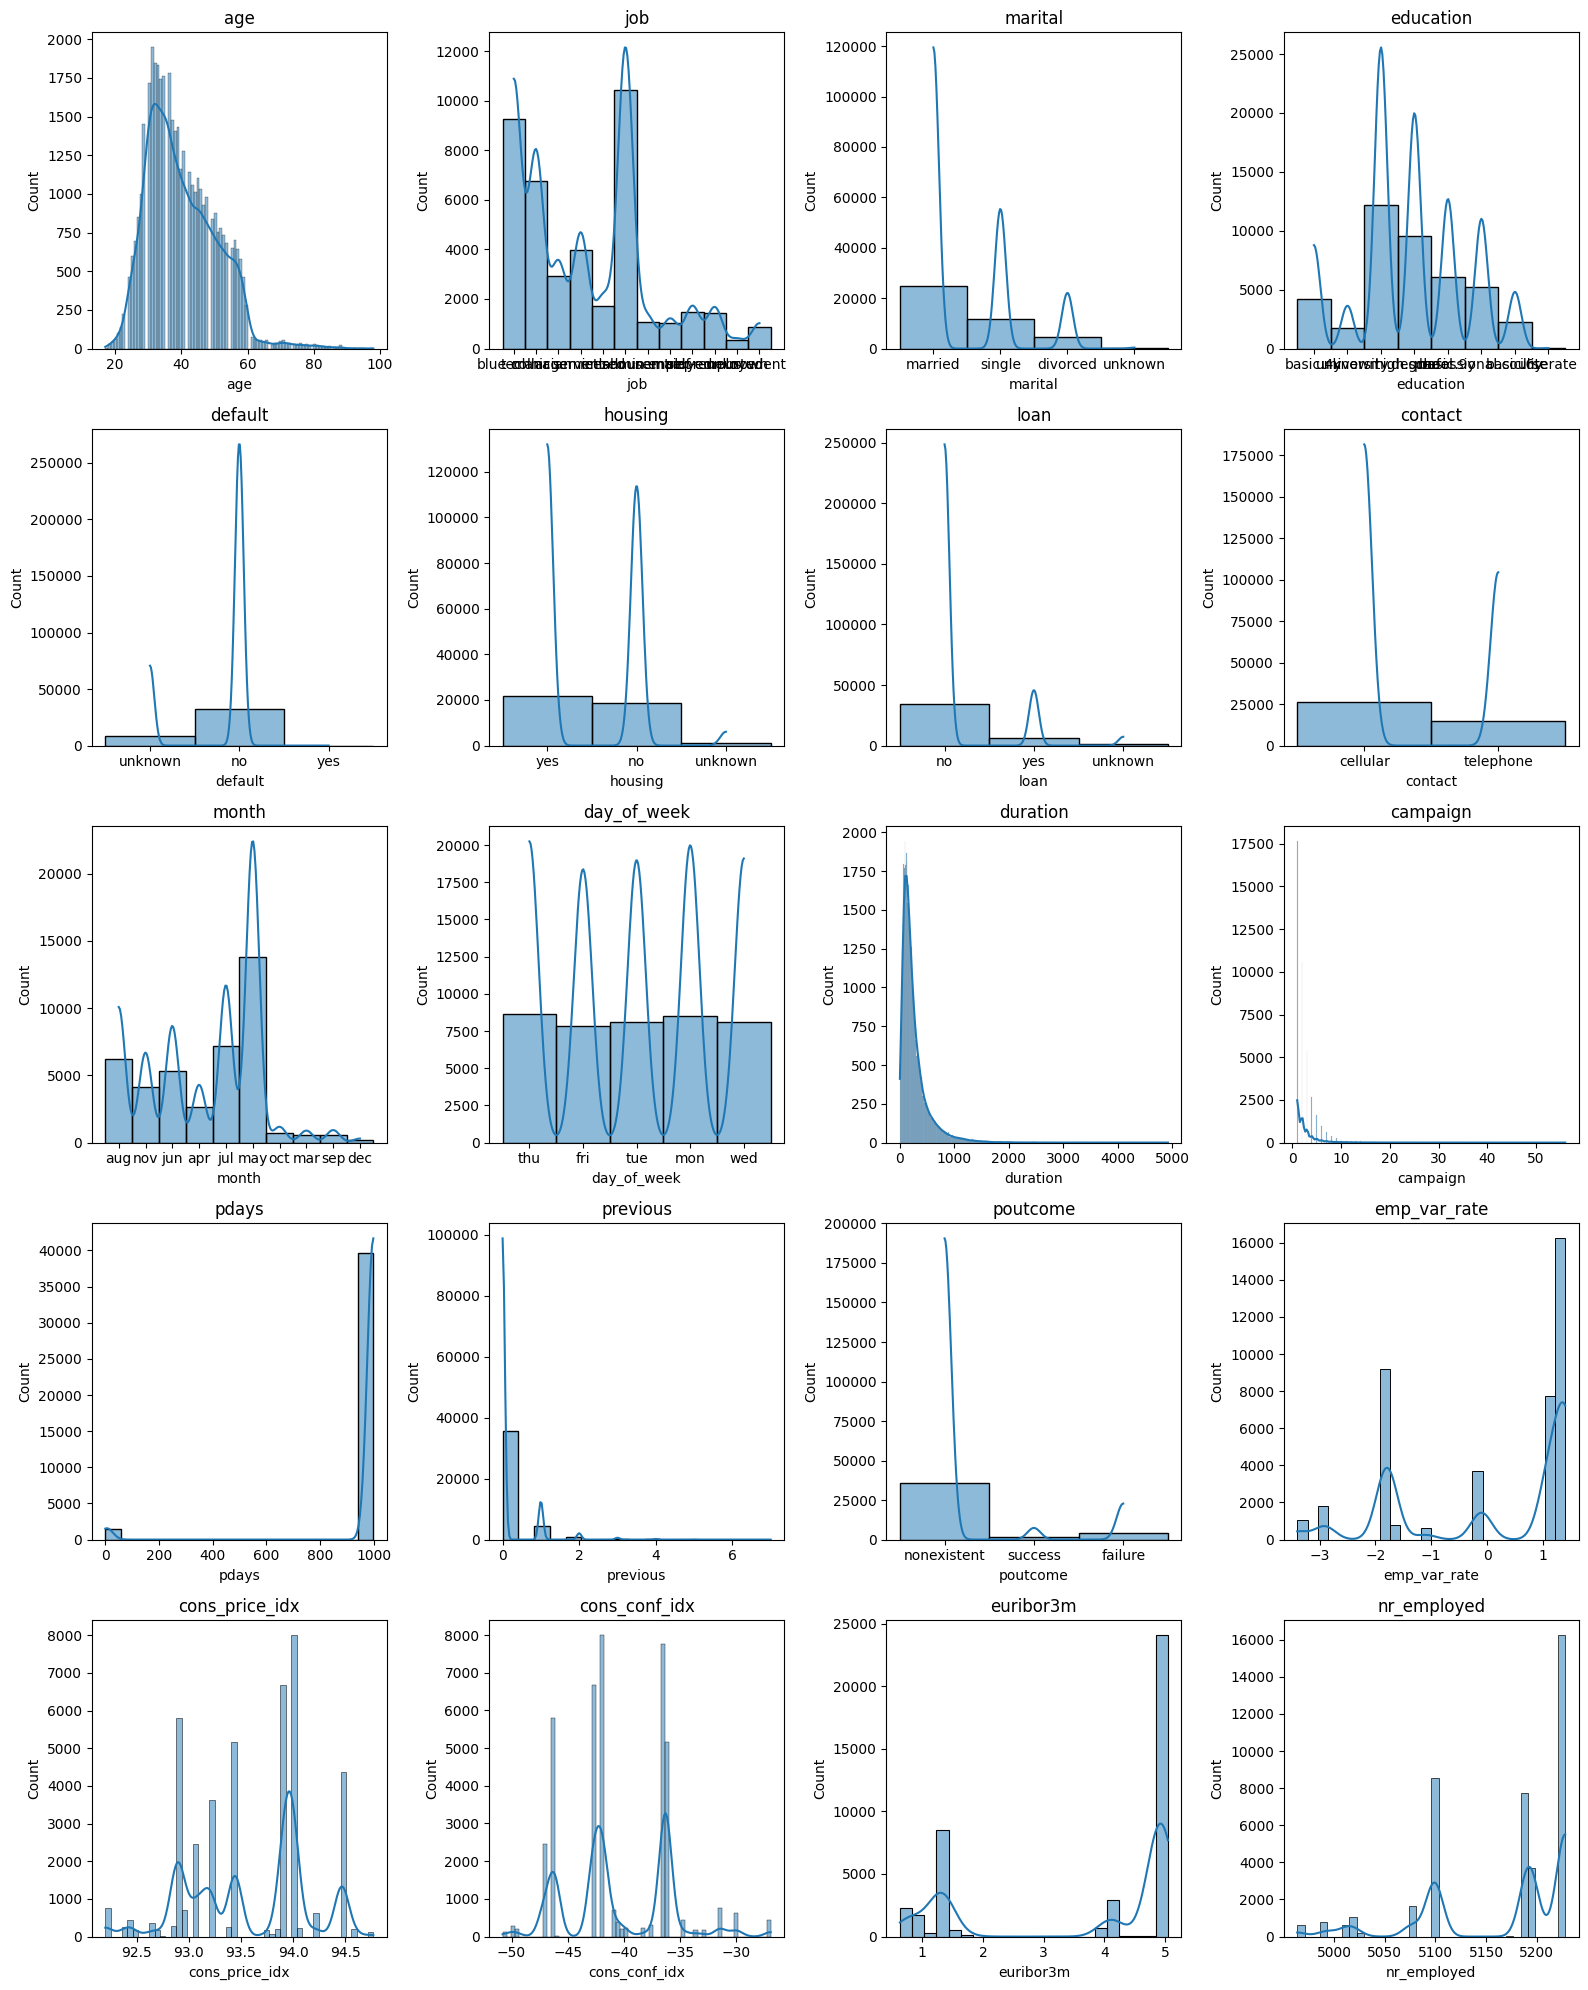

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(16, 20))
for i, col in enumerate(["age", "job", "marital", "education","default","housing","loan","contact","month","day_of_week","duration","campaign","pdays","previous","poutcome","emp_var_rate","cons_price_idx","cons_conf_idx","euribor3m","nr_employed"]):
    plt.subplot(5,4,i+1)
    sns.histplot(data[col].dropna(), kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

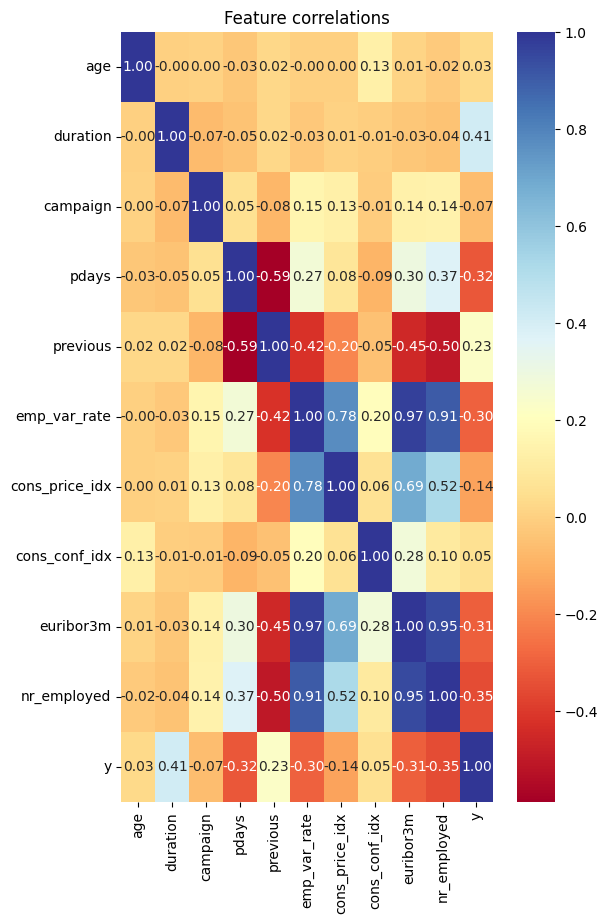

In [19]:
plt.figure(figsize=(6,10))
sns.heatmap(data.select_dtypes(include='number').corr(), annot=True, fmt=".2f", cmap="RdYlBu")
plt.title("Feature correlations")
plt.show()

In [20]:
X=data.drop("y",axis=1)
y=data["y"]

In [21]:
from sklearn.model_selection import train_test_split
# Split the data (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42, stratify=y
)

print("Training set class ratio:\n", y_train.value_counts(normalize=True))
print("\nTesting set class ratio:\n", y_test.value_counts(normalize=True))

Training set class ratio:
 y
0    0.887343
1    0.112657
Name: proportion, dtype: float64

Testing set class ratio:
 y
0    0.887351
1    0.112649
Name: proportion, dtype: float64


In [22]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X_train.select_dtypes(include=['object']).columns
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)
X_train_scaled = X_train_processed
X_test_scaled = X_test_processed

In [23]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

In [24]:
y_pred = model.predict(X_test_scaled)
y_pred_prob = model.predict_proba(X_test_scaled)[:, 1]

In [25]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
numerical_cols_full = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols_full = X.select_dtypes(include=['object']).columns
numerical_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])
categorical_pipeline = OneHotEncoder(handle_unknown='ignore')
preprocessor_full = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_cols_full),
        ('cat', categorical_pipeline, categorical_cols_full)
    ],
    remainder='passthrough'
)
X_pre_transformed = preprocessor_full.fit_transform(X)
categorical_feature_names = preprocessor_full.named_transformers_['cat'].get_feature_names_out(categorical_cols_full)
all_feature_names = list(numerical_cols_full) + list(categorical_feature_names)
X_pre = pd.DataFrame(X_pre_transformed, columns=all_feature_names)
print("Preprocessed X sample:\n", X_pre.head())

Preprocessed X sample:
         age  duration  campaign     pdays  previous  emp_var_rate  \
0  0.381527 -0.186230 -0.565922  0.195414 -0.349494      0.839061   
1  1.245157 -0.463926 -0.565922  0.195414 -0.349494     -0.115781   
2 -1.153816  0.311309  0.156105 -5.117342  3.691766     -1.134279   
3 -0.098268 -0.282652 -0.204909  0.195414 -0.349494     -1.197935   
4  1.437075 -0.467783 -0.565922 -5.133393  1.671136     -1.898153   

   cons_price_idx  cons_conf_idx  euribor3m  nr_employed  ...  month_oct  \
0       -0.227465       0.951267   0.773575     0.845170  ...        0.0   
1       -0.649003      -0.323542   0.230456     0.398115  ...        0.0   
2        0.828107       0.151810  -1.667578    -2.428157  ...        0.0   
3       -0.864955      -1.425496  -1.277824    -0.940281  ...        0.0   
4       -2.374889       1.966794  -1.586859    -1.257233  ...        0.0   

   month_sep  day_of_week_fri  day_of_week_mon  day_of_week_thu  \
0        0.0              0.0        

In [26]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns
num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])
cat_pipeline = Pipeline([
    ("onehot", OneHotEncoder(handle_unknown='ignore'))
])
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_pipeline, numerical_cols),
        ('cat', cat_pipeline, categorical_cols)
    ],
    remainder='passthrough'
)
clf_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("clf", LogisticRegression(max_iter=2000, solver="liblinear", class_weight="balanced"))
])
clf_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome'],
      dtype='object'))])),
                ('clf',
                 LogisticRegression(class_weight='balanced', max_iter=2000,
                                    solver='liblinear'))])

In [27]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report,
    roc_auc_score,
    roc_curve
)
import matplotlib.pyplot as plt
# Predictions and probabilities
y_pred = clf_pipeline.predict(X_test)
y_proba = clf_pipeline.predict_proba(X_test)[:,1]

# Metrics
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)

print("Accuracy:", round(acc,4))
print("Precision:", round(prec,4))
print("Recall (Sensitivity):", round(rec,4))
print("F1-score:", round(f1,4))
print("ROC-AUC:", round(roc_auc,4))
print("\nClassification report:\n", classification_report(y_test, y_pred, digits=4))

Accuracy: 0.8627
Precision: 0.4448
Recall (Sensitivity): 0.8829
F1-score: 0.5916
ROC-AUC: 0.9398

Classification report:
               precision    recall  f1-score   support

           0     0.9830    0.8601    0.9175     10965
           1     0.4448    0.8829    0.5916      1392

    accuracy                         0.8627     12357
   macro avg     0.7139    0.8715    0.7545     12357
weighted avg     0.9224    0.8627    0.8807     12357



Confusion matrix:
 [[9431 1534]
 [ 163 1229]]


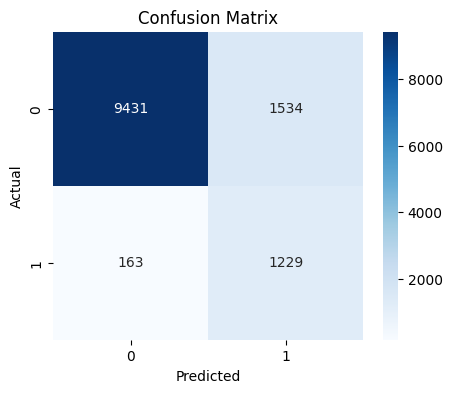

In [28]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n", cm)
import seaborn as sns
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

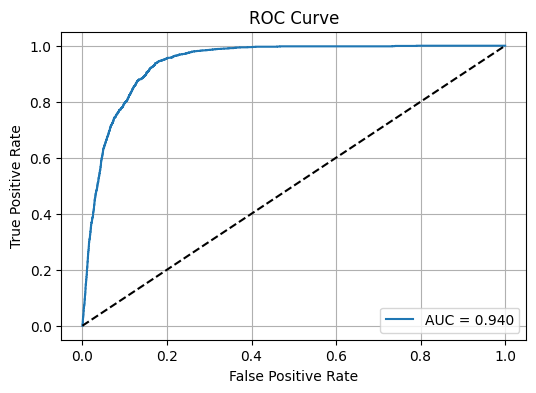

In [29]:
# ROC curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
plt.plot([0,1],[0,1],"k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()

In [30]:
from sklearn.calibration import calibration_curve
#import numpy as np
# Example: check calibration
prob_true, prob_pred = calibration_curve(y_test, y_proba, n_bins=10)
# If you want to change the decision threshold:
threshold = 0.4  # lower threshold to increase sensitivity
y_pred_thresh = (y_proba >= threshold).astype(int)
print("Metrics at threshold", threshold)
print("Precision:", precision_score(y_test, y_pred_thresh))
print("Recall:", recall_score(y_test, y_pred_thresh))

Metrics at threshold 0.4
Precision: 0.41120305537873963
Recall: 0.9281609195402298


In [ ]:
pipeline = Pipeline([clf_pipeline])

In [31]:
# Build a sample customer (using original feature names from the banking dataset)
sample = pd.DataFrame([
    {
        "age": 45,
        "job": "blue-collar",
        "marital": "married",
        "education": "basic.4y",
        "default": "no",
        "housing": "yes",
        "loan": "no",
        "contact": "cellular",
        "month": "aug",
        "day_of_week": "thu",
        "duration": 200,
        "campaign": 1,
        "pdays": 999,
        "previous": 0,
        "poutcome": "nonexistent",
        "emp_var_rate": 1.4,
        "cons_price_idx": 93.444,
        "cons_conf_idx": -36.1,
        "euribor3m": 4.963,
        "nr_employed": 5228.1
    }
])

proba = clf_pipeline.predict_proba(sample)[0][1]
predicted_class = int(proba >= 0.5)
print("Predicted probability of subscription:", round(proba,3))
print("Predicted class (0=no_subscription,1=subscription):", predicted_class)


Predicted probability of subscription: 0.056
Predicted class (0=no_subscription,1=subscription): 0
